![](https://github.com/gitflai/imagens/blob/main/capa.jpg?raw=true)

#Investigando o Perfil do Profissional de Dados Brasileiro
##Pesquisa Data Hackers 2019

A Análise desses dados foi possível devido a incrível pesquisa conduzida pela equipe do Data Hackers em novembro de 2019. Os dados foram coletados on-line e abrange profissonais de diversas ramificações da área de dados. 

O dataset está anonimizado e, por isso, muitas variáveis possuem dados faltantes. 

As perguntas feitas foram as seguintes:

1. Pergunta_1 (P1) = Idade? [Mascarada]
2. Pergunta_2 (P2) = Gênero? [Mascarada]
3. Pergunta_3 (P3) = Atualmente você vive no Brasil?
4. Pergunta_4 (P4) = ~~Em que país você vive hoje?~~
5. Pergunta_5 (P5) = Em que estado você vive hoje? [Mascarada]
6. Pergunta_6 (P6) = Na questão anterior você disse que vive em _____ . Esse é seu estado de origem (onde nasceu ou se formou)?
7. Pergunta_7 (P7) = ~~Qual seu estado de origem?~~
8. Pergunta_8 (P8) = Qual seu nível de ensino? 
9. Pergunta_9 (P9) = ~~Qual sua área de formação?~~
10. Pergunta_10 (P10) = Qual sua situação atual de trabalho? 
11. Pergunta_11 (P11) = ~~A empresa em que você trabalha pertence a qual setor?~~
12. Pergunta_12 (P12) = A empresa em que você trabalha possui quantos funcionários atualmente?
13. Pergunta_13 (P13) = Você atua como gestor?
14. Pergunta_14 (P14) = ~~Qual das opções abaixo definem melhor seu cargo de trabalho atual como gestor?~~
15. Pergunta_15 (P15) = ~~Qual das opções abaixo definem melhor seu cargo de trabalho atual?~~
16. Pergunta_16 (P16) = Qual sua faixa salarial atual? [Mascarada]
17. Pergunta_17 (P17) = Quanto tempo de experiência na área de dados você tem?
18. Pergunta_18 (P18) = Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?
19. Pergunta_19 (P19) = Você se considera um profissional que atua na área de Data Science?
20. Pergunta_20 (P20) = Quais dos métodos listados abaixo você costuma utilizar no trabalho?
21. Pergunta_21 (P21) = Quais das linguagens de programação listadas abaixo você utiliza no trabalho?
22. Pergunta_22 (P22) = Entre as linguagens de programação listadas abaixo, qual é a que você mais utiliza no trabalho? [Mascarada]
23. Pergunta_23 (P23) = Quais das fontes de dados listadas você já analisou no trabalho?
24. Pergunta_24 (P24) = Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo? Selecione no máximo duas opções que você mais utiliza.
25. Pergunta_25 (P25) = Quais das opções de Cloud listadas abaixo você utiliza no trabalho?
26. Pergunta_26 (P26) = Quais dos bancos de dados/fontes de dados listados abaixo você utiliza para consultar informações, e posteriormente analisar, no trabalho?
27. Pergunta_27 (P27) = Quais as Ferramentas de Business Intelligence você utiliza no trabalho?
28. Pergunta_28 (P28) = Quais as tecnologias são utilizadas como ferramenta de ETL no seu trabalho?
29. Pergunta_29 (P29) = Sua organização possui um Data Warehouse?
30. Pergunta_30 (P30) = Qual tecnologia utilizada como plataforma do Data Warehouse?
31. Pergunta_31 (P31) = Quais das iniciativas do Data Hackers que você já acessou/acompanhou?
32. Pergunta_32 (P32) = Entre as iniciativas do Data Hackers qual a sua preferida?
33. Pergunta_33 (P33) = De quais outras formas que você costuma se atualizar no mundo dos dados?
34. Pergunta_34 (P34) = Em quais dessas plataformas listadas abaixo você já iniciou/completou cursos na área de Data Science?
35. Pergunta_35 (P35) = Dentre as plataformas listadas abaixo qual foi a sua preferida para cursos de Data Science?
36. Pergunta_36 (P36) = Você deseja participar do sorteio?

Além dessas, derivamos algumas outras colunas:
1. Derivado_1 (D1) = Macrorregião em que mora
2. Derivado_2 (D2) = Macrorregião em que nasceu
3. Derivado_3 (D3) = Área de formação anonimizada
4. Derivado_4 (D4) = Setor de mercado anonimizado
5. Derivado_5 (D5) = Nível de gerência anonimizado
6. Derivado_6 (D6) = Cargo anonimizado

Mais informações e os dados da pesquisa podem ser encontrados no kaggle: https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019.

In [111]:
#Importando blibiotecas
 
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from google.colab import files

In [112]:
#Lendo os dados do github
caminho = '/content/datahackers-survey-2019-anonymous-responses.csv'

dados = pd.read_csv(caminho)

dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

##Preparação dos dados
Nessa sessão, estamos modificando algumas variáveis, preparando os dados para a análise exploratória.

Algumas das modificações realizadas foram:

  * Categorizar o tamanho das empresas entre, pequena, média e grande, de acordo com o seu número de funcionários
  * Agrupar as profissões com características semelhantes
  * Recategorizar o tempo de experiência, já que algumas categorias da variável original apresentavam inconsistência
  * Estabelecer uma ordem para a variável de escolaridade
  * Criar uma variável discreta de salário, pegando o ponto médio das faixas salariais
  * Categorizar a variável de idade
  * Renomear as variáveis mais utilzadas para facilitar seu acesso
  * Criar subconjuntos de dados de cada uma da profissão de interesse



In [113]:
#Agrupando as profissões
profmap = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software', 
                                            'Outras': 'Outras',
                 'Data Scientist/Cientista de Dados': 'Cientista de Dados',
                    'Data Analyst/Analista de Dados': 'Analista de Dados',
              'Business Intelligence/Analista de BI': 'Analista de BI',
                 'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
             'Business Analyst/Analista de Negócios': 'Analista de BI',
               'Analista de Inteligência de Mercado': 'Analista de BI',
                                        'Engenheiro': 'Outras',
                             'Analista de Marketing': 'Outras',
                    'Engenheiro de Machine Learning': 'Cientista de Dados',
               'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
                                       'Estatístico': 'Cientista de Dados',
                                        'Economista': 'Outras'}

           
dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap) 


#Criando tamanho da empresa
tammap = { 'de 1 a 5': 'Pequena',
           'de 6 a 10': 'Pequena',
           'de 11 a 50': 'Pequena',
           'de 51 a 100': 'Pequena',
           'de 101 a 500': 'Média',
           'de 501 a 1000': 'Média',
           'de 1001 a 3000': 'Grande',
           'Acima de 3000': 'Grande'}

           

#Recategorizando experiência
temp_xp_ds = {
    
    'Menos de 1 ano':'Até 1 ano',
    'Não tenho experiência na área de dados':'Até 1 ano',
    'de 1 a 2 anos':'De 1 a 3 anos',
    'de 2 a 3 anos':'De 1 a 3 anos',
    'de 4 a 5 anos':'De 3 a 5 anos',
    'de 6 a 10 anos':'Maior que 5',
    'Mais de 10 anos':'Maior que 5'  

}



#Ordenando escolaridade
esc_map = CategoricalDtype(
  ['Prefiro não informar','Não tenho graduação formal',
  'Estudante de Graduação','Graduação/Bacharelado',
  'Pós-graduação','Mestrado','Doutorado ou Phd'],
           ordered=True
)


#Discretizando salario
salamap = {    'Menos de R$ 1.000/mês': 1000,
      'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
       'de R$ 2.001/mês a R$ 3000/mês': 2500,
      'de R$ 3.001/mês a R$ 4.000/mês': 3500,
      'de R$ 4.001/mês a R$ 6.000/mês': 5000, 
      'de R$ 6.001/mês a R$ 8.000/mês': 7000,
     'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500, 
              'Acima de R$ 25.001/mês': 25000}



#Discretização da idade 
cortes = [0, 24, 30, 40, 100]
nomes = ['[18,24]', '[25,30]', '[31,40]', '[41,50]']

#Criando um novo dataset com as informações de maior interesse 
dados['idade'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)
dados['salario'] = dados["('P16', 'salary_range')"].map(salamap)  
dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tammap) 
dados['gestor'] = dados["('P13', 'manager')"].map({0: 'não', 1: 'sim'})
dados['se_considera_ds'] = dados["('P19', 'is_data_science_professional')"].map({0: 'não', 1: 'sim'})
dados['sexo'] = dados["('P2', 'gender')"]
dados['experiencia_ds'] = dados["('P17', 'time_experience_data_science')"].map(temp_xp_ds)
dados['tipo_de_trabalho'] = dados["('P10', 'job_situation')"]
dados['escolaridade'] = dados["('P8', 'degreee_level')"].astype(esc_map)
dados['area_de_formacao'] = dados["('D3', 'anonymized_degree_area')"]
dados['setor_de_mercado'] = dados["('D4', 'anonymized_market_sector')"]
dados['plataforma_favorita'] = dados["('P35', 'data_science_plataforms_preference')"] 

#Criando conjuntos de dados convenientes através de alguns filtros
#Profissoes de dados

lista = ['Cientista de Dados', 'Analista de Dados', 'Analista de BI', 'Engenheiro de Dados']
pds = dados[dados['profissao'].isin(lista)]
cds = dados[dados['profissao'] == 'Cientista de Dados'] 
ads = dados[dados['profissao'] == 'Analista de Dados'] 
abi = dados[dados['profissao'] == 'Analista de BI'] 
eds = dados[dados['profissao'] == 'Engenheiro de Dados'] 


##Paleta de cores
Aqui criamos uma paleta de cores a fim de padronizar a exposição dos gráficos.

In [114]:
#Criando paleta de cores
cores = ['#080047','#110099','#3219FF','#197CFF','#6BAAFF','#6BDEFF','#A8ECFF']
cores2 = ['#080047','#197CFF']
cores3 = ['#080047','#197CFF','#A8ECFF']
cores4 = ['#080047','#3219FF','#6BAAFF','#A8ECFF']
cores1 = ['#197CFF']
cores_venn = ['#080047','#197CFF','#778899']


#Análise exploratória

Nessa seção iniciaremos a exploração das variáveis. Primeiro, olhamos para as variáveis individualmente, depois cruzaremos as informações para observar as condicionantes do perfil do profissional de dados.


##As principais profissões
Aqui verificamos a relação das profissões individualmente, seus salários, e agrupamentos de acordo com suas características.

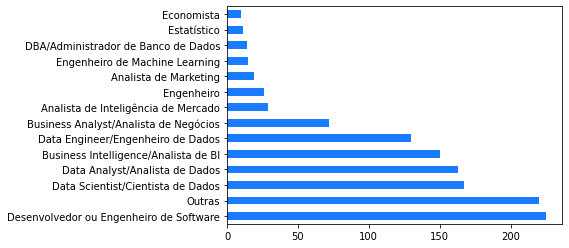

In [115]:
#Profissões gerais desagrupadas
plt = dados["('D6', 'anonymized_role')"].value_counts().plot(kind = 'barh', color = cores1)

Através da figura de profissões desagrupadas, notam-se que as profissões que mais se destacam em termos de frequência são as de Desenvolvedor ou Engenheiro de Software, Cientista de Dados, e Analista de Dados. A ideia principal nessa análise é agrupar as principais profissões, e analisá-las, em especial o Cientista de Dados.

In [116]:
#Profissões gerais 
plt=dados['profissao'].value_counts()#.plot(kind = 'barh',legend = False)
plt
#plt.set_xlabel('Frequencia')
#plt.set_ylabel('Profissão')

Outras                                  275
Analista de BI                          251
Desenvolvedor/Engenheiro de Software    225
Cientista de Dados                      193
Analista de Dados                       163
Engenheiro de Dados                     144
Name: profissao, dtype: int64

Após o agrupamento nas 4 profissões de interesse, observamos uma frequência maior para a categoria de outras profissões. A ideia é focar nas profissões de dados explorando somente essas categorias.

In [117]:
#Salários Gerais
lista_p = ['Cientista de Dados', 'Analista de Dados', 
                              'Analista de BI', 'Engenheiro de Dados']
banco_tmep = {}
   
for var_tmp in lista_p:

  banco_tmep[var_tmp] = [dados['salario'][dados['profissao'] == var_tmp].mean()]

banco_tmep = pd.DataFrame(banco_tmep)
banco_tmep = banco_tmep.round(2).T
banco_tmep.columns = ["Salário"]
banco_tmep = banco_tmep.sort_values('Salário')
banco_tmep
#plt=banco_tmep.plot(kind="barh")

,Salário
Analista de BI,4978.09
Analista de Dados,5036.81
Cientista de Dados,6831.61
Engenheiro de Dados,7802.08


Na tabela acima, observamos os salários médios de cada uma das profissões de dados. Observamos que a profissão que mais se destaca é Engenheiro de Dados, seguido por Cientista de Dados, Analista de Dados e Analista de BI

##Cientista de Dados
Dentre as profissões de dados, as que temos mais interesse é a de cientísta de dados, logo, iremos aprofundar a análise apenas para o profissional cientista de dados

In [118]:
dados.salario.mean()

6283.235101506221

###Idade, gênero e suas relações
Dentre as variáveis sociodemográficas de interesse, se destacam gênero e idade por frequentemente serem associadas a desigualdades na frequência de suas populações.

28.0

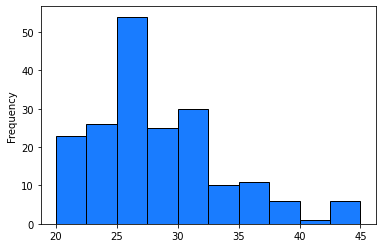

In [119]:
#Verificando idade
plt = cds["('P1', 'age')"].plot(kind = 'hist', edgecolor = 'black', color = cores1)
abi["('P1', 'age')"].median()

Observamos que a faixa de idade dos profissionais vai de 20 até 45 anos, sendo a faixa etária mais frequente a que vai de 25 até 30 anos

In [120]:
#Frequencia por Gênero
plt = cds['sexo'].value_counts()
plt

Masculino    161
Feminino      31
Name: sexo, dtype: int64

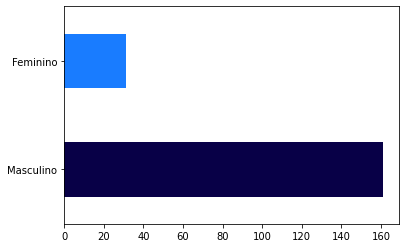

In [121]:
plt = plt.plot(kind = 'barh',color = cores2) 
plt

O gap entre a frequência dos profissionais do gênero feminino e masculino é grande, representando o gênero feminino, apenas 16% dos profissionais da área de dados leia-se Engenheiro de Dados, Cientista de Dados, Analista de Dados e Analista de BI. 

In [57]:
#Salário: Sexo x Idade
plt = cds.groupby('idade').mean()['salario']#.unstack().T#.plot(kind = 'bar',color = cores2)
plt

idade
[18,24]     3724.489796
[25,30]     6324.468085
[31,40]    11083.333333
[41,50]    10642.857143
Name: salario, dtype: float64

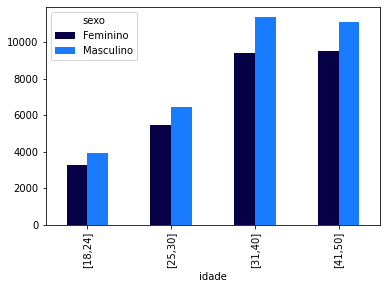

In [58]:
#Salário: Sexo x Idade

plt = cds.groupby(['sexo', 'idade']).mean()['salario'].unstack(
    ).T.plot(kind = 'bar',color = cores2)

Nota-se que não somente as frequências são dispares, mas também os salários entre os gêneros. Verificando as faixas de idade por salário observa-se uma ascensão do salário quando visto de acordo com cada faixa etária. Nota-se também que a diferença de salário entre gênero é menor para as faixas etárias de 18 a 24 e de 25 a 30, em relação as faixas superiores.  

###Tamanho da empresa

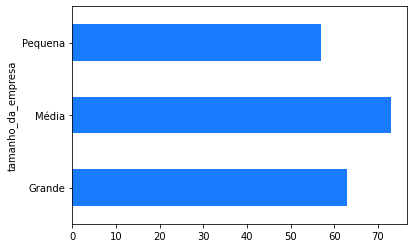

In [59]:
#Frequencia: Tamanho da empresa
plt = cds.groupby('tamanho_da_empresa').count()['salario'].plot(kind = "barh",
                                                              color = cores1) 

In [60]:
#Salário: Tamanho da empresa
plt = cds.groupby('tamanho_da_empresa').mean()['salario']#.plot(kind="barh", color=cores1)  
plt


tamanho_da_empresa
Grande     8079.365079
Média      7260.273973
Pequena    4903.508772
Name: salario, dtype: float64

É possível observar que dentre as classes de tamanhos de empresas a mais frequente é a de tamanho médio. Nota-se também que o salário médio aumenta de acordo com o tamanho da empresa.

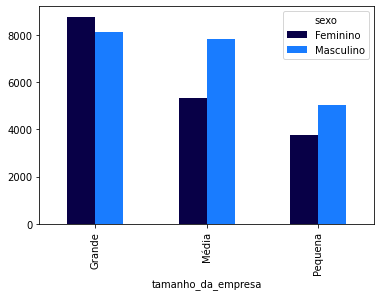

In [61]:
#Salário: Sexo x Tamanho da empresa
plt = cds.groupby(['sexo', 'tamanho_da_empresa']).mean()['salario'].unstack(
    ).T.plot(kind = 'bar', color =  cores2)

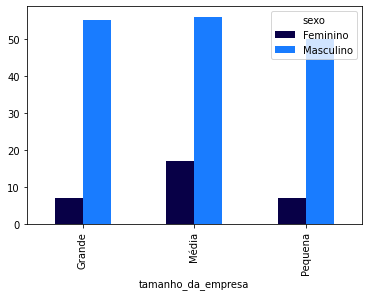

In [62]:
#Frequencia: Sexo x Tamanho da empresa
plt = cds.groupby(['sexo', 'tamanho_da_empresa']).count()['salario'].unstack(
    ).T.plot(kind = 'bar', color = cores2)

O gênero masculino é predominante em empresas de todos os tamanhos, em especial as empresas de tamanho médio, apresentam uma menor diferença entre os gêneros em relação as demais. Já os salários médios entre os gêneros são distintos nas empresas. Empresas de tamanho médio apresentam maior diferença de salário sendo o salário médio masculino maior que o feminino. Já nas empresas grande o salário médio feminino é maior que o masculino. Entretanto essa segmentação de dados apresenta pouca frequência o que pode não apresentar uma forte significância estatística.

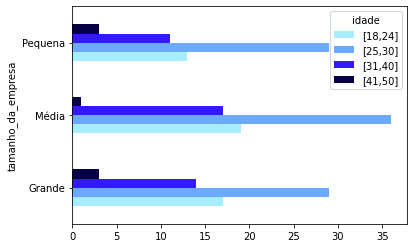

In [63]:
#Frequencia: Idade x Tamanho da empresa
plt = cds.groupby(['idade', 'tamanho_da_empresa']).count()['salario'].unstack(
    ).T.plot(kind = 'barh', color = cores4[::-1])

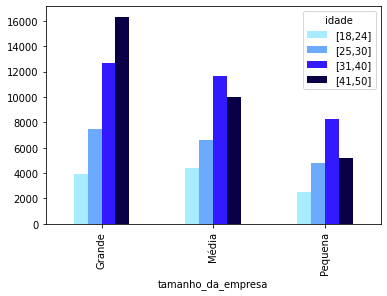

In [64]:
#Salário: Idade x Tamanho da empresa
plt = cds.groupby(['idade', 'tamanho_da_empresa']).mean()['salario'].unstack(
    
).T.plot(kind = 'bar', color = cores4[::-1])



O perfil de idade é semelhante em presas de todos os tamanhos, sendo a faixa mais frequente a de 25 a 30 anos. Já em termos de salário o perfil de idade dentre os tamanhos de empresa se difere. Nas empresas de tamanho grande, quanto maior a idade maior o salário, já nas empresas de tamanho médio e pequeno a faixa etária com maior salário é a de 31 a 40 anos. 

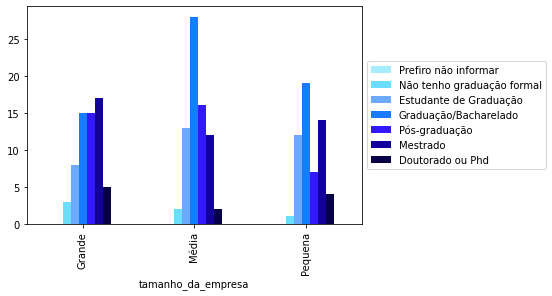

In [65]:
#Frequencia: Escolaridade x Tamanho da empresa
plt = cds.groupby(['escolaridade',
                   'tamanho_da_empresa']).count()['salario'].unstack(
    
).T.plot(kind = 'bar', color = cores[::-1]).legend(loc='center left',
                                                  bbox_to_anchor = (1, 0.5))


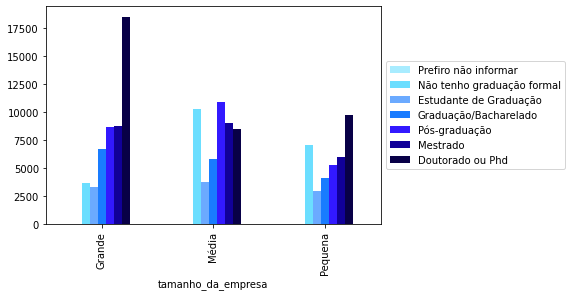

In [66]:
#Salário: Escolaridade x Tamanho da empresa
plt = cds.groupby(['escolaridade',
                   'tamanho_da_empresa']).mean()['salario'].unstack(
    ).T.plot(kind = 'bar', color=cores[::-1]).legend(loc = 'center left',
                                                bbox_to_anchor = (1, 0.5))

A escolaridade se difere dentre os tamanhos das empresas, onde empresas maiores tem mais profissionais com graduação, pós graduação e mestrado. Já as empresas de tamanho pequeno e médio a frequência dos profissionais com apenas graduação é soberana. Com foco em salário o cenário se difere, as empresas grandes pagam melhor os profissionais de acordo com suas escolaridades, sendo os profissionais com doutorado, mais bem pagos em relações aos demais. 

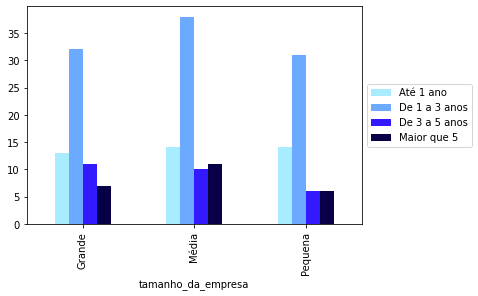

In [67]:
#Frequencia: Experiencia em DS x Tamanho da empresa
plt = cds.groupby(['experiencia_ds',
                   'tamanho_da_empresa']).count()['salario'].unstack(
    
).T.plot(kind = 'bar', color = cores4[::-1]).legend(loc = 'center left',
                                                   bbox_to_anchor=(1, 0.5))



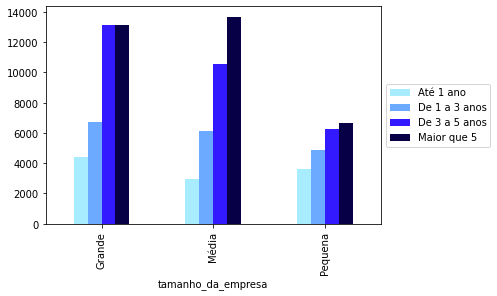

In [68]:
#Salário: Experiencia em DS x Tamanho da empresa
plt = cds.groupby(['experiencia_ds', 
                   'tamanho_da_empresa']).mean()['salario'].unstack(
    ).T.plot(kind = 'bar', color = cores4[::-1]).legend(loc = 'center left',
                                                   bbox_to_anchor=(1, 0.5))

A experiência em Data Science é uma variável chave, quando se analisa o perfil do profissional. A faixa de experiência mais frequente é de 1 a 3 anos. Já o salário dentre as classes de experiência, é possível observar que quanto maior a experiência maior é o salário. 

###Experiência em Data Science

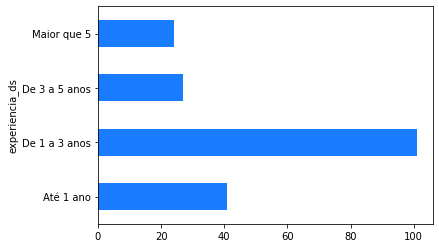

In [69]:
#Frequencia: Experiencia em Data Science
plt = cds.groupby('experiencia_ds').count()['salario'].plot(kind = "barh", color = cores1) 

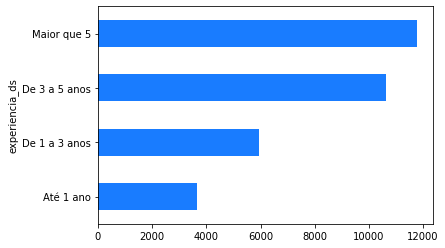

In [70]:
#Salario: Experiência em Data Science
plt = cds.groupby('experiencia_ds').mean()['salario'].plot(kind = "barh", color = cores1) 

In [71]:
cds.groupby('experiencia_ds').mean()['salario']

experiencia_ds
Até 1 ano         3646.341463
De 1 a 3 anos     5930.693069
De 3 a 5 anos    10648.148148
Maior que 5      11770.833333
Name: salario, dtype: float64

A faixa de experiência mais frequente é de 1 a 3 anos. Já o salário dentre as classes de experiência, é possível observar que quanto maior a experiência maior é o salário. 

###Escolaridade

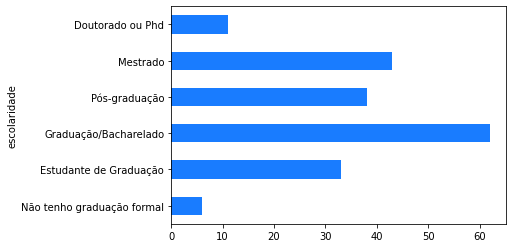

In [72]:
#Frequencia: Escolaridade
plt = cds.groupby('escolaridade').count()['salario']
plt = plt[1:7]
plt = plt.plot(kind = "barh", color = cores1)


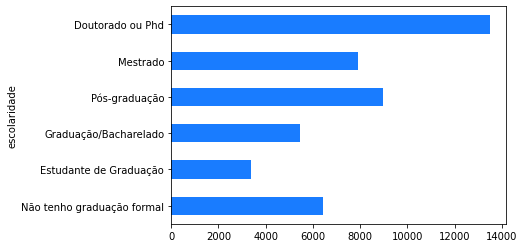

In [73]:
#Salario: Escolaridade
plt = cds.groupby('escolaridade').mean()['salario'][1:7].plot(kind = "barh",
                                                              color = cores1)  

As empresas grandes pagam melhor os profissionais de acordo com suas escolaridades, sendo os profissionais com doutorado, mais bem pagos em relações aos demais. 

###Setor de mercado

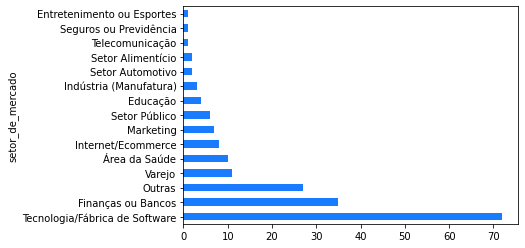

In [74]:
#Frequencia: Setor de mercado
plt = cds.groupby('setor_de_mercado').count()['salario']
plt = plt.sort_values(ascending = False).plot(kind = "barh", color = cores1 )   


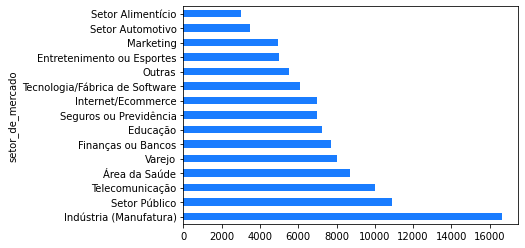

In [75]:
#Salário: Setor de mercado
plt = cds.groupby('setor_de_mercado').mean()['salario']
plt = plt.sort_values(ascending = False).plot(kind = "barh" , color = cores1)  

Entre os setores que mais empregam os profissionais de dados estão a área de tecnologia, finanças ou bancos, varejo, área de saúde, internet e marketing. Entre essas áreas, os salários que mais se destacam são a área de saúde, varejo, finanças e bancos. 

##Linguagens de programação
Aqui queremos investigar o uso das principais linguagens de programação de acordo com cada profissional da área de dados 

In [76]:
#Criando uma função de seleção dos dados

def n_inner(p, r, s, prof):

    if prof == "pds":  lista = ['Cientista de Dados', 'Analista de Dados', 
                                'Analista de BI', 'Engenheiro de Dados']
    elif prof == "cds":  lista = ['Cientista de Dados']

    elif prof == "ads":  lista = ['Analista de Dados']

    elif prof == "abi":  lista = ['Analista de BI']

    elif prof == "eds":  lista = ['Engenheiro de Dados']
    
    temp = dados[(dados["('P21', 'r')"] == r) &
               (dados["('P21', 'python')"] == p) & 
               (dados["('P21', 'sql_')"] == s) & 
               (dados['profissao'].isin(lista))].shape[0]

    return temp


###Todas as profissões

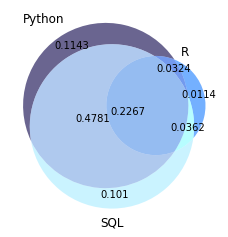

In [77]:
#Uso das ferramentas por profissão 
#Python R e SQL
#Em todas as profissões
import matplotlib.pyplot

lista = [n_inner(1,0,0,"pds"), n_inner(0,1,0,"pds"), n_inner(1,1,0,"pds"),
         n_inner(0,0,1,"pds"), n_inner(1,0,1,"pds"), n_inner(0,1,1,"pds"),
         n_inner(1,1,1,"pds")]

s = sum(lista)

lista = [x / s for x in lista]

lista = np.around(lista,4)

venn3(subsets = lista, set_labels = ('Python', 'R', 'SQL'), alpha = 0.6,
      set_colors = cores3)



Através do diagrama de venn de todos as profissões, observa-se um perfil de uso dos 3 softwares Python, R e SQL, de uso predominante do Python com 85% das respostas. Python também é a maior linguagem de programação com uso exclusivo, com 11%, seguido por SQL com 10% e R com 1%. Os profissionais que usam apenas Python e SQL representam 48% das respostas. Já os que usam apenas Python e R somam 3%, apenas R e SQL 4% e os que usam R Python e SQL representam 23%. Nota-se que o perfil do profissional está fortemente ligado a Python e SQL, e o r como uma ferramenta complementar acessória, mas não essencial. 

###Cientista de Dados

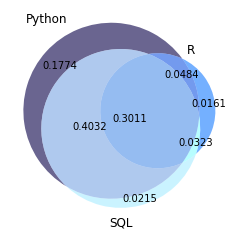

In [78]:
#Cientista de dados
lista = [n_inner(1,0,0,"cds"), n_inner(0,1,0,"cds"), n_inner(1,1,0,"cds"),
         n_inner(0,0,1,"cds"), n_inner(1,0,1,"cds"), n_inner(0,1,1,"cds"),
         n_inner(1,1,1,"cds")]

s = sum(lista)

lista = [x / s for x in lista]

lista = np.around(lista, 4)

venn3(subsets = lista, set_labels = ('Python', 'R', 'SQL'), alpha = 0.6,
      set_colors = cores3)
 

Através do diagrama de venn do Cientista de Dados, observa-se um perfil de uso dos 3 softwares Python, R e SQL, de uso predominante do Python com 93% das respostas. Python também é a maior linguagem de programação com uso exclusivo, com 18%, seguido por SQL com 2% e R com 2%. Os profissionais que usam apenas Python e SQL representam 40% das respostas. Já os que usam apenas Python e R somam 5%, apenas R e SQL 3% e os que usam R Python e SQL representam 30%. Nota-se que o perfil do profissional está fortemente ligado a Python e SQL, e o R como uma ferramenta complementar, para uso mais específico. 

###Analista de Dados

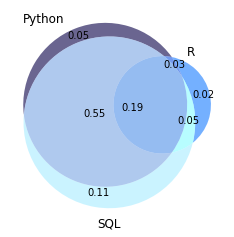

In [79]:
#Analista de Dados
lista = [n_inner(1,0,0,"ads"), n_inner(0,1,0,"ads"), n_inner(1,1,0,"ads"),
         n_inner(0,0,1,"ads"), n_inner(1,0,1,"ads"), n_inner(0,1,1,"ads"),
         n_inner(1,1,1,"ads")]

s = sum(lista)

lista = [x / s for x in lista]

lista = np.around(lista,2)

venn3(subsets = lista, set_labels = ('Python', 'R', 'SQL'), alpha = 0.6,
      set_colors = cores3)


Através do diagrama de venn do Analista de Dados, observa-se um perfil de uso dos 3 softwares Python, R e SQL, de uso predominante do Python com 82% das respostas. SQL  é a maior linguagem de programação com uso exclusivo, com 11%, seguido por Python com 5% e R com 2%. Os profissionais que usam apenas Python e SQL representam 55% das respostas. Já os que usam apenas Python e R somam 3%, apenas R e SQL 5% e os que usam R Python e SQL representam 19%. Nota-se que o perfil do profissional está fortemente ligado SQL.

###Analista de BI

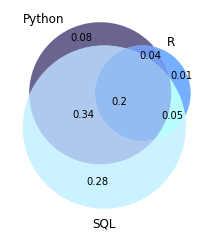

In [80]:
#Analista de BI
lista = [n_inner(1,0,0,"abi"), n_inner(0,1,0,"abi"), n_inner(1,1,0,"abi"),
         n_inner(0,0,1,"abi"), n_inner(1,0,1,"abi"), n_inner(0,1,1,"abi"),
         n_inner(1,1,1,"abi")]

s = sum(lista)

lista = [x / s for x in lista]

lista = np.around(lista,2)

venn3(subsets = lista, set_labels = ('Python', 'R', 'SQL'), alpha = 0.6,
      set_colors = cores3)



Através do diagrama de venn do Analista de BI, observa-se um perfil de uso dos 3 softwares Python, R e SQL, de uso predominante do SQL com 87% das respostas. SQL  é a maior linguagem de programação com uso exclusivo, com 28%, seguido por Python com 8% e R com 1%. Os profissionais que usam apenas Python e SQL representam 34% das respostas. Já os que usam apenas Python e R somam 4%, apenas R e SQL 5% e os que usam R Python e SQL representam 20%. Nota-se que o perfil do profissional está fortemente ligado SQL.

###Engenheiro de Dados

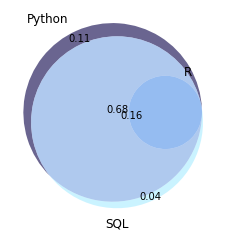

In [81]:
#Engenheiro de Dados
lista = [n_inner(1,0,0,"eds"), n_inner(0,1,0,"eds"), n_inner(1,1,0,"eds"),
         n_inner(0,0,1,"eds"), n_inner(1,0,1,"eds"), n_inner(0,1,1,"eds"),
         n_inner(1,1,1,"eds")]

s = sum(lista)

lista = [x / s for x in lista]

lista = np.around(lista,2)

venn3(subsets = lista, set_labels = ('Python', 'R', 'SQL'), alpha = 0.6,
      set_colors = cores3)



Através do diagrama de venn do Engenheiro de Dados, observa-se um perfil de uso dos 3 softwares Python, R e SQL, de uso predominante do SQL e Python com 84% das respostas. O R nesse cenário é acessório, não existindo uso exclusivo.

##Métodos mais utilizados

Nessa sessão queremos investigar quais os métodos mais utilizados de acordo com cada profissão de dados, bem como o salário médio de acordo com cada método empregado.


###Todas as profissões

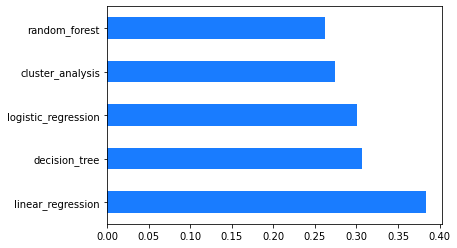

In [82]:
#Ferramentas mais utilizadas em todas profissões
data_temp = pds

temp = data_temp.filter(regex = 'P20').sum().sort_values(
    ascending = False)/data_temp.shape[0]

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:

    index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index = index_antigo
  
temp[(temp >= 0.20) & (temp != "no_listed_methods")].plot(kind = "barh" 
                                                          , color = cores1)


Os métodos mais utilizados estão os métodos clássicos como regressão linear e regressão logística, mas como também outros métodos supervisionados como árvores de decisão e floresta aleatória. 

###Cientista de Dados

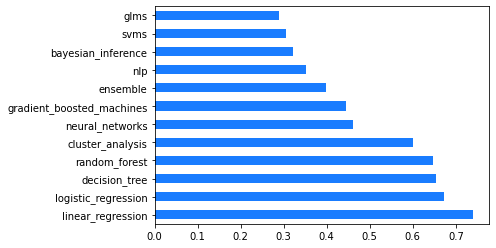

In [83]:
#Ferramentas mais utilizadas para Data Scinetist
data_temp = cds

temp = data_temp.filter(regex = 'P20').sum().sort_values(
      ascending = False)/data_temp.shape[0]

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index=index_antigo

temp[(temp>=0.20) & (temp != "no_listed_methods")].plot(kind = "barh",
                                                        color = cores1)


Dentre os métodos utilizados por mais de 20% dos Cientistas de Dados, destacam-se também os métodos clássicos como regressão linear e regressão logística, mas também métodos modernos como redes neurais, processamento de linguagem natural e gradient boosting.

###Analista de Dados

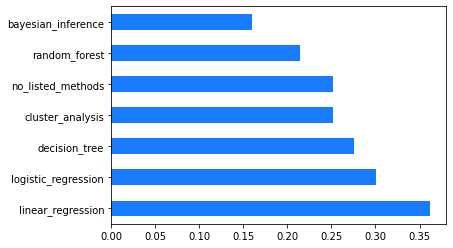

In [84]:
#Ferramentas mais utilizadas para Analista de Dados
data_temp = ads

temp = data_temp.filter(regex = 'P20').sum().sort_values(

    ascending = False)/data_temp.shape[0]

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:

  index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index=index_antigo

temp

temp[(temp >= 0.15) & (temp != "no_listed_methods")].plot(kind = "barh",
                                                          color = cores1)



Já o Analista de Dados apresenta uma frequência mais baixa dos métodos comuns ao Cientista de Dados. Filtrando os dados para usados por pelo menos 15% dos profissionais, restringem-se a apenas a 7 métodos. Talvez essa profissão utilize outros métodos não listados entre os métodos em comum com o Cientista de Dados.


###Analista de BI

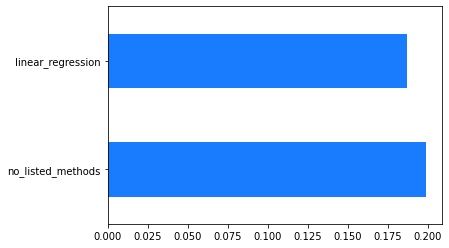

In [85]:
#Ferramentas mais utilizadas para analista de BI
data_temp = abi

temp = data_temp.filter(regex = 'P20').sum().sort_values(
    
    ascending = False)/data_temp.shape[0]

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:

  index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index = index_antigo

temp

temp[(temp>=0.15) & (temp != "no_listed_methods")].plot(kind = "barh"
, color = cores1)


O Analista de BI tem muito menos métodos em comum do que o Cientista de Dados, apresentando apenas dois métodos quando filtramos o conjunto de dados para métodos utilizado por mais de 15% dos profissionais. Essa profissão tende a usar outros tipos de ferramentas, por isso os únicos métodos aparentes são regressão linear e outros métodos não listados.

###Engenheiro de Dados

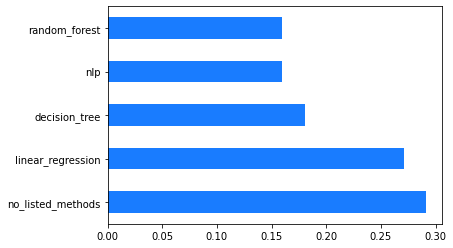

In [86]:
#Ferramentas mais utilizadas para Engenheiro de Dados
data_temp = eds

temp=data_temp.filter(regex = 'P20').sum().sort_values(
    ascending = False)/data_temp.shape[0]

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index=index_antigo
 
temp[(temp>=0.15) & (temp != "no_listed_methods")].plot(kind = "barh", 
                                                        color = cores1)


O Engenheiro de Dados compartilha alguns métodos em comum com o Cientista de Dados. Filtramos o conjunto de dados para métodos utilizados por mais de 15% dos profissionais a profissão usa regressão linear, árvores de decisão, processamento de linguagem natural e floresta aleatória.  Essa profissão tende atuar de maneira distinta do Cientista de Dados e, por isso, apresenta com frequência maior do que outros métodos não listados. 

##Métodos utilizados por tamanho da empresa

Os métodos utilizados pelos profissionais de acordo com os tamanhos das empresas não apresentam uma grande distinção. Nota-se em geral um uso expressivo dos métodos clássicos como regressão linear, logística e árvores de decisão. Entretanto as empresas grandes tendem a usar uma variedade maior de métodos do que as empresas pequenas e de tamanho médio, quando filtramos os dados para os métodos usados por pelo menos 30% das respostas.


###Empresa grande 

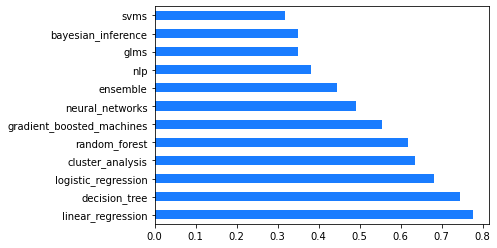

In [87]:
#Empresa grande 

data_temp = cds[cds['tamanho_da_empresa'] == "Grande"]

temp=data_temp.filter(regex = 'P20').sum().sort_values(
    ascending = False)/data_temp.shape[0]

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index = index_antigo
  
temp[(temp>=0.30) & (temp!="no_listed_methods")].plot(kind="barh", 
                                                      color = cores1)

###Empresa média

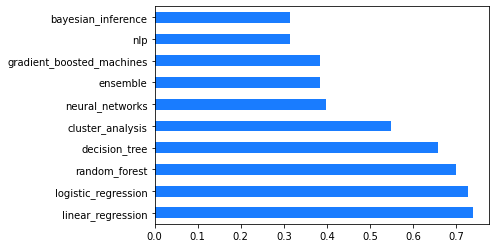

In [88]:
#Empresa média

data_temp = cds[cds['tamanho_da_empresa']=="Média"]

temp=data_temp.filter(regex = 'P20').sum().sort_values(
    ascending = False)/data_temp.shape[0]

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index = index_antigo
 
temp[(temp >= 0.30) & (temp != "no_listed_methods")].plot(kind = "barh",
                                                          color = cores1)

###Empresa pequena

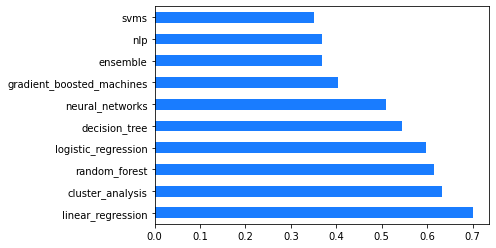

In [89]:
#empresa pequena

data_temp = cds[cds['tamanho_da_empresa'] == "Pequena"]

temp=data_temp.filter(regex = 'P20').sum().sort_values(
    ascending = False)/data_temp.shape[0]

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:

  index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index = index_antigo
 
temp[(temp >= 0.30) & (temp != "no_listed_methods")].plot(kind = "barh",
                                                          color = cores1)

##Salário médio por método utilizado

Através das tabelas abaixo, é possível observar o salário médio de acordo com o uso de cada método, bem como o número de informações utilizadas para compor cada métrica. 

##Todas as profissões

In [90]:
#Todas as profissões

col_temp = pds.filter(regex = 'P20').columns

banco_tmep = {}

for var_tmp in col_temp:
    banco_tmep[var_tmp] = [pds['salario'][pds[var_tmp] == 1].mean()]

temp = pd.DataFrame(banco_tmep).T

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index = index_antigo

temp[0] = temp[0].round(2)

temp[1] = list(pds.filter(regex = 'P20').sum())

temp.columns = ["Salário","N"]

temp.sort_values("Salário",ascending = False,)

,Salário,N
gans,10111.11,9
hmms,8250.00,10
ensemble,8102.15,93
rnns,8077.78,45
gradient_boosted_machines,7726.85,108
longitudinal_data_analysis,7691.49,47
glms,7397.26,73
svms,7250.00,84
decision_tree,7030.43,230
bayesian_inference,7008.40,119


Nota-se, como já observado anteriormente, que o método mais utilizado entre os profissionais da área de dados é a regressão linear. Entretanto, a média de salário dos profissionais que utilizam esse método não está entre os salários mais altos. O método com maior salário médio, foi o GANS (redes adversárias generativas), porém, esse salário é declarado por poucos profissionais, o que pode carecer de significância estatística. Um destaque especial para Gradient Boosted Machines, que apresenta um salário acima da mediana e tem uma grande quantidade de pessoas utilizando.  

###Cientista de Dados

In [91]:
#Cientista de Dados
col_temp = cds.filter(regex = 'P20').columns

banco_tmep = {}

for var_tmp in col_temp:
    banco_tmep[var_tmp] = [cds['salario'][cds[var_tmp] == 1].mean()]

temp = pd.DataFrame(banco_tmep).T

index_antigo = list(temp.index)

tira_caracteres = ["P20", "'",',','(',')',' ']

for caract_temp in tira_caracteres:
    index_antigo = [w.replace(caract_temp,'') for w in index_antigo]

temp.index = index_antigo

temp[0] = temp[0].round(2)

temp[1] = list(cds.filter(regex = 'P20').sum())

temp.columns = ["Salário","N"]

temp.sort_values("Salário",ascending = False,)

,Salário,N
gans,10111.11,9
hmms,8625.00,8
rnns,8585.71,35
ensemble,8344.16,77
longitudinal_data_analysis,7852.94,34
svms,7847.46,59
cluster_analysis,7806.03,116
gradient_boosted_machines,7738.37,86
cnns,7718.75,32
decision_tree,7571.43,126


Assim com nos resultados anteriores, os métodos utilizados pelo Cientista de Dados são regressão linear e logística. Mas para esse profissional, os salários médios de quem utiliza esses métodos estão próximos da média salarial. Alguns métodos se destacam por apresentarem um salário acima da média e terem bastantes informações para compor essa métrica. Esses métodos são métodos de ensemble e análise de cluster. 

##Comentários

Algumas variáveis não foram analisadas por acreditarmos que suas informações não representam a realidade da população referenciada. Um exemplo é a variável de localização. As regiões como norte e nordeste tiveram informações removidas, a fim de preservar a identidade dos participantes da pesquisa. Como essa remoção pode ter sido realizada de maneira não aleatória, preferimos não utilizar essa variável nas análises. 

Vejam quantas informações foram extraídas desse conjunto de dados. Por incrível que pareça, mesmo após mais de 1 ano da disponibilização dos dados, não vimos uma análise tão completa e profunda como essa. E há muito mais que ainda pode ser feito. Daqui em diante, seria interessante aprofundar o estudo em relação a testes estatísticos e verificar quais diferenças, de fato, existem nesse gigante e complexo mercado. 